<a href="https://colab.research.google.com/github/abrishwon21/ML_in_Python/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
data =load_breast_cancer()
df_cancer=pd.DataFrame(data['data'],columns=data['feature_names'])
df_cancer['Type']=data['target']
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df_cancer.loc[:,'mean radius':'worst fractal dimension'],df_cancer.loc[:,'Type'],test_size=0.20,random_state=1)


In [12]:
#to check the shape
print("the shape of xtrain ",xtrain.shape)
print("the shape of xtest ",xtest.shape)
print("the shape of ytrain ",ytrain.shape)
print("the shape of ytest ",ytest.shape)

the shape of xtrain  (455, 30)
the shape of xtest  (114, 30)
the shape of ytrain  (455,)
the shape of ytest  (114,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
pvtrain=model.predict(xtrain)
pvtest=model.predict(xtest)


In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
traccur=accuracy_score(ytrain,pvtrain)
testAccu=accuracy_score(ytest,pvtest)
print("The train data accuracy ",traccur)


The train data accuracy  1.0


In [21]:
print("the test accuracy ",testAccu)

the test accuracy  0.9473684210526315


In [23]:
cmtrain=confusion_matrix(ytrain,pvtrain)
cmtrain

array([[170,   0],
       [  0, 285]])

In [24]:
cmtest=confusion_matrix(ytest,pvtest)
cmtest

array([[38,  4],
       [ 2, 70]])

In [36]:
fi=model.feature_importances_
fi

array([0.        , 0.        , 0.        , 0.        , 0.00932724,
       0.        , 0.        , 0.02884436, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01091934, 0.        ,
       0.04173833, 0.        , 0.        , 0.        , 0.00782594,
       0.03303369, 0.0949773 , 0.72929043, 0.        , 0.        ,
       0.        , 0.        , 0.04404337, 0.        , 0.        ])

<BarContainer object of 30 artists>

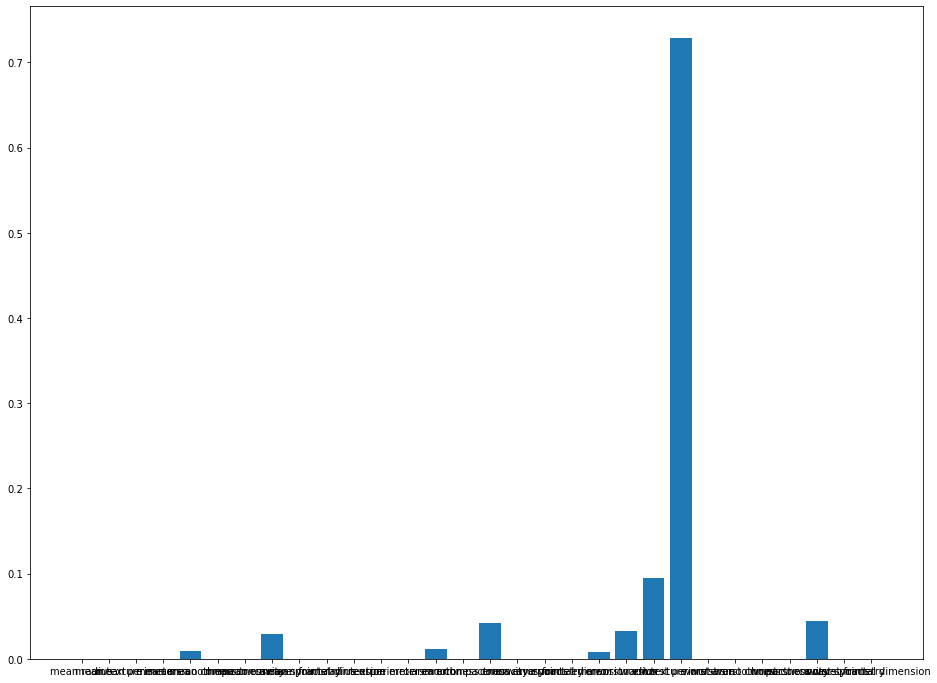

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
plt.bar(data['feature_names'],fi)

In [47]:
df_cancer_final=pd.DataFrame([df_cancer['mean texture'],df_cancer['mean compactness'],df_cancer['mean concave points'],df_cancer['worst perimeter']])

In [48]:
df_cancer_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568
mean texture,10.3800,17.77000,21.2500,20.3800,14.3400,15.70000,19.980,20.83000,21.82000,24.04000,23.24000,17.89000,24.8000,23.95000,22.61000,27.54000,20.13000,20.6800,22.15000,14.36000,15.7100,12.44000,14.26000,23.04000,21.3800,16.4000,21.53000,20.25000,25.27000,15.05000,25.1100,18.70000,23.9800,26.47000,17.88000,21.59000,21.72000,18.42000,25.20000,20.82000,...,13.44000,17.56000,20.02000,16.33000,20.6700,17.62000,20.8600,22.55000,24.44000,25.49000,25.44000,14.44000,24.9900,25.42000,28.06000,20.70000,23.23000,16.350000,16.58000,19.340000,24.21000,21.48000,22.44000,29.43000,21.94000,28.92000,27.61000,19.59000,27.88000,22.68000,23.93000,27.15000,29.37000,30.62000,25.0900,22.3900,28.25000,28.08000,29.330,24.54000
mean compactness,0.2776,0.07864,0.1599,0.2839,0.1328,0.17000,0.109,0.16450,0.19320,0.23960,0.06669,0.12920,0.2458,0.10020,0.22930,0.15950,0.07200,0.2022,0.10270,0.08129,0.1270,0.06492,0.21350,0.10220,0.1457,0.2276,0.18680,0.10660,0.16970,0.11570,0.1887,0.15160,0.1496,0.17190,0.15590,0.13360,0.10980,0.03766,0.05131,0.12550,...,0.09009,0.09713,0.09453,0.07255,0.1313,0.09752,0.1739,0.11540,0.15520,0.04878,0.11990,0.11200,0.1230,0.07214,0.06877,0.10180,0.06747,0.049940,0.08066,0.050300,0.06602,0.04227,0.08194,0.04234,0.05605,0.05824,0.07658,0.07504,0.04971,0.13300,0.10210,0.11260,0.03558,0.20870,0.2236,0.1159,0.10340,0.10230,0.277,0.04362
mean concave points,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,0.03323,0.06606,0.1118,0.05364,0.08025,0.07364,0.05259,0.1028,0.09498,0.04781,0.0311,0.02076,0.09756,0.08632,0.0917,0.1401,0.08783,0.07731,0.08751,0.07953,0.1244,0.05182,0.1203,0.07593,0.07752,0.06018,0.05598,0.02923,0.02899,0.05439,...,0.02798,0.04440,0.02157,0.01880,0.1015,0.02788,0.1322,0.06139,0.04531,0.00000,0.01364,0.02594,0.0389,0.03027,0.03275,0.02369,0.02443,0.005495,0.02438,0.009615,0.00816,0.00000,0.02257,0.01499,0.01282,0.02343,0.02738,0.01116,0.00000,0.03736,0.04105,0.04304,0.00000,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0.00000
worst perimeter,184.6000,158.80000,152.5000,98.8700,152.2000,103.40000,153.200,110.60000,106.20000,97.65000,123.80000,136.50000,151.7000,112.00000,108.80000,124.10000,123.40000,136.8000,186.80000,99.70000,96.0900,65.13000,125.10000,188.00000,177.0000,152.4000,122.40000,139.90000,149.30000,134.90000,160.5000,119.40000,136.1000,161.40000,132.70000,133.50000,116.20000,84.46000,95.54000,107.30000,...,86.92000,88.52000,87.00000,101.60000,152.0000,76.43000,160.2000,104.30000,86.12000,57.17000,54.49000,78.78000,113.5000,107.40000,92.48000,99.17000,97.58000,71.120000,71.08000,69.100000,83.90000,74.08000,77.80000,88.10000,62.86000,88.84000,69.57000,67.88000,66.50000,105.90000,82.28000,100.20000,75.19000,128.70000,179.1000,166.1000,155.00000,126.70000,184.600,59.16000
